In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib as mpl

from scipy.stats import kde
from scipy.interpolate import interp2d


import numpy as np

In [99]:
plt.style.use('seaborn')

In [100]:
mpl.rcParams['font.family'] = 'Serif'

In [101]:
def add_days_to_date(date, days):
    """Add days to a date and return the date.
    
    Args: 
        date (string): Date string in YYYY-MM-DD format. 
        days (int): Number of days to add to date
    
    Returns: 
        date (date): Date in YYYY-MM-DD with X days added. 
    """
    
    added_date = pd.to_datetime(date) + timedelta(days=days)

    return added_date

In [102]:
def getImage(path):
    
    return OffsetImage(plt.imread(path), zoom=.1)

In [103]:
def calc_binned_goalnums(matches, coi):
    
    usmnt_elos = np.arange(1650, 1950, 11.5)
    opp_elos = np.arange(1000, 2350, 50)
    
    bin_means = np.zeros((len(opp_elos), len(usmnt_elos)))
    bin_stds = np.zeros((len(opp_elos), len(usmnt_elos)))

    bin_means = pd.DataFrame(bin_means)
    bin_stds = pd.DataFrame(bin_stds)

    bin_means = bin_means.reindex(labels=opp_elos)
    bin_means.columns = usmnt_elos

    bin_stds = bin_stds.reindex(labels=opp_elos)
    bin_stds.columns = usmnt_elos
    
    for x in range(1,len(opp_elos)):
        for y in range(1, len(usmnt_elos)):

            qt = matches[(matches['Opp Pre-Match Elo'] > opp_elos[x-1]) & (matches['Opp Pre-Match Elo'] < opp_elos[x])]
            qt1 = qt[(qt['USMNT Pre-Match Elo'] > usmnt_elos[y-1]) & (qt['USMNT Pre-Match Elo'] < usmnt_elos[y])]

            bin_mean = np.mean(qt1[coi])
            bin_means.iloc[x-1, y-1] = bin_mean

            bin_std = np.std(qt1[coi])
            bin_stds.iloc[x-1, y-1] = bin_std
            
    bin_means = bin_means.fillna(value=0.0)
    bin_stds = bin_stds.fillna(value=0.0)
    
    return bin_means, bin_stds

In [104]:
matches = pd.read_csv('usmnt_matches.csv', header=0)

In [105]:
flag_codes = pd.read_json('./country-flags-main/countries.json', typ='series')

In [106]:
#pd.value_counts(matches['Opponent'])

In [107]:
for code in flag_codes:
    print(code)

Andorra
United Arab Emirates
Afghanistan
Antigua and Barbuda
Anguilla
Albania
Armenia
Angola
Antarctica
Argentina
American Samoa
Austria
Australia
Aruba
Åland Islands
Azerbaijan
Bosnia and Herzegovina
Barbados
Bangladesh
Belgium
Burkina Faso
Bulgaria
Bahrain
Burundi
Benin
Saint Barthélemy
Bermuda
Brunei Darussalam
Bolivia, Plurinational State of
Caribbean Netherlands
Brazil
Bahamas
Bhutan
Bouvet Island
Botswana
Belarus
Belize
Canada
Cocos (Keeling) Islands
Congo, the Democratic Republic of the
Central African Republic
Republic of the Congo
Switzerland
Côte d'Ivoire
Cook Islands
Chile
Cameroon
China (People's Republic of China)
Colombia
Costa Rica
Cuba
Cape Verde
Curaçao
Christmas Island
Cyprus
Czech Republic
Germany
Djibouti
Denmark
Dominica
Dominican Republic
Algeria
Ecuador
Estonia
Egypt
Western Sahara
Eritrea
Spain
Ethiopia
Europe
Finland
Fiji
Falkland Islands (Malvinas)
Micronesia, Federated States of
Faroe Islands
France
Gabon
England
Northern Ireland
Scotland
Wales
United Kingdom

In [108]:
for ind, val in enumerate(matches['Date']):
    
    matches.loc[ind, 'Date'] = add_days_to_date('1900-01-01', val)

In [109]:
for ind, val in enumerate(matches['Opponent']):
    
    #print(val)
    
    flag_code = flag_codes[flag_codes == val].index[0]
    flag_code = flag_code.lower()
    
    matches.loc[ind, 'Opp Flag Path'] = f'./country-flags-main/png100px/{flag_code}.png'


In [110]:
matches

,Date,Opponent,Location,USMNT Pre-Match Elo,USMNT Post-Match Elo,Opp Pre-Match Elo,Elo Diff,Modified Elo,GF,GA,...,xGA,xGD,A Team?,Pulisic MP,McKennie MP,Adams MP,Gio MP,Dest MP,Musah MP,Opp Flag Path
0,2024-03-26 00:00:00,Mexico,1,1774,1800,1826,-52,48,2,0,...,NaN,NaN,Y,90,90,45,79,0,11,./country-flags-main/png100px/mx.png
1,2024-03-23 00:00:00,Jamaica,1,1762,1774,1623,139,239,3,1,...,0.90,1.20,Y,120,120,37,74,90,63,./country-flags-main/png100px/jm.png
2,2024-01-22 00:00:00,Slovenia,1,1776,1762,1710,66,166,0,1,...,NaN,NaN,N,0,0,0,0,0,0,./country-flags-main/png100px/si.png
3,2023-11-23 00:00:00,Trinidad and Tobago,-1,1810,1776,1398,412,312,1,2,...,NaN,NaN,Y,0,0,0,42,39,90,./country-flags-main/png100px/tt.png
4,2023-11-18 00:00:00,Trinidad and Tobago,1,1806,1810,1402,404,504,3,0,...,0.02,1.98,Y,0,90,0,90,90,90,./country-flags-main/png100px/tt.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1999-03-15 00:00:00,Mexico,1,1739,1726,1878,-139,-39,1,2,...,NaN,NaN,Y,0,0,0,0,0,0,./country-flags-main/png100px/mx.png
413,1999-03-13 00:00:00,Guatemala,1,1733,1739,1516,217,317,0,0,...,NaN,NaN,Y,0,0,0,0,0,0,./country-flags-main/png100px/gt.png
414,1999-02-23 00:00:00,Chile,1,1725,1733,1754,-29,71,2,1,...,NaN,NaN,Y,0,0,0,0,0,0,./country-flags-main/png100px/cl.png
415,1999-02-08 00:00:00,Germany,1,1699,1725,1978,-279,-179,3,0,...,NaN,NaN,Y,0,0,0,0,0,0,./country-flags-main/png100px/de.png


In [111]:
a_team = matches[matches['A Team?'] == 'Y']

In [112]:
b_team = matches[matches['A Team?'] == 'N']

In [113]:
matches_2020s = matches[matches['Date'] > pd.to_datetime("2020-01-01")]

a_team_2020s = matches_2020s[matches_2020s['A Team?'] == 'Y']
b_team_2020s = matches_2020s[matches_2020s['A Team?'] == 'N']

In [114]:
matches_2010s = matches[(matches['Date'] > pd.to_datetime("2010-01-01")) & (matches['Date'] < pd.to_datetime("2020-01-01"))]

In [115]:
matches_2000s = matches[(matches['Date'] > pd.to_datetime("2000-01-01")) & (matches['Date'] < pd.to_datetime("2010-01-01"))]

In [116]:
future_dates = np.array([pd.to_datetime("2024-01-20"),
                         pd.to_datetime("2024-03-21"),
                         pd.to_datetime("2024-03-24")])
                        
future_high_elos = np.array([1762, 1818, 1866])

future_low_elos = np.array([1762, 1683, 1628])
                        

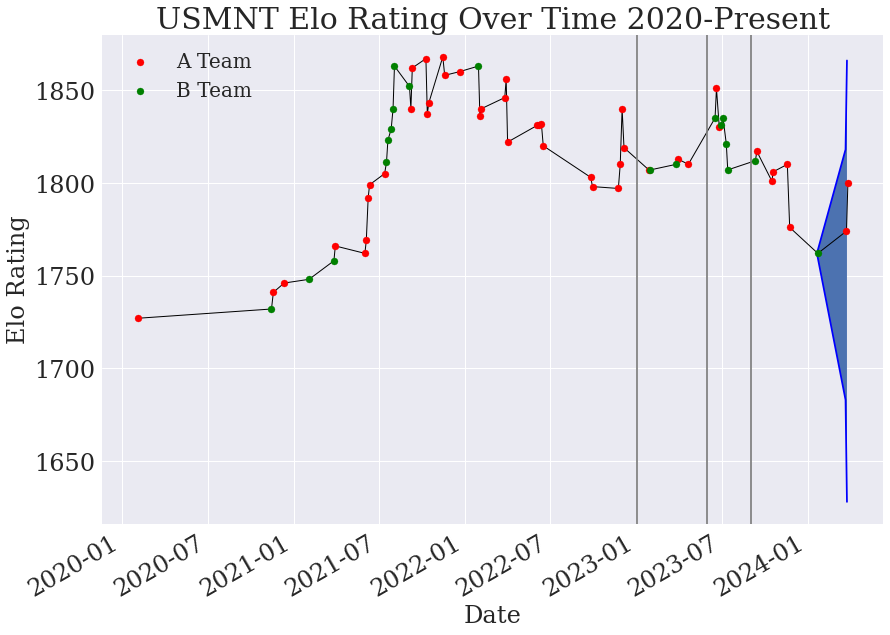

In [117]:
fix, ax = plt.subplots(figsize=(14,10), facecolor='white')

ax.plot(matches_2020s['Date'], matches_2020s['USMNT Post-Match Elo'], lw=1, c='k')
ax.scatter(a_team_2020s['Date'], a_team_2020s['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')
ax.scatter(b_team_2020s['Date'], b_team_2020s['USMNT Post-Match Elo'], c='g', zorder=10, label='B Team')
ax.plot(future_dates, future_high_elos, c='b')
ax.plot(future_dates, future_low_elos, c='b')
ax.fill_between(future_dates, future_high_elos, future_low_elos)

plt.gcf().autofmt_xdate()

ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Elo Rating', fontsize=24)

ax.axvline(pd.to_datetime("2023-01-01"), c='gray')
ax.axvline(pd.to_datetime("2023-05-30"), c='gray')
ax.axvline(pd.to_datetime("2023-09-01"), c='gray')

ax.set_title('USMNT Elo Rating Over Time 2020-Present', fontsize=30)

ax.legend(fontsize=20, loc='upper left')
ax.tick_params(labelsize=24)

plt.savefig('./USMNT_Elo/projected_elo.pdf')

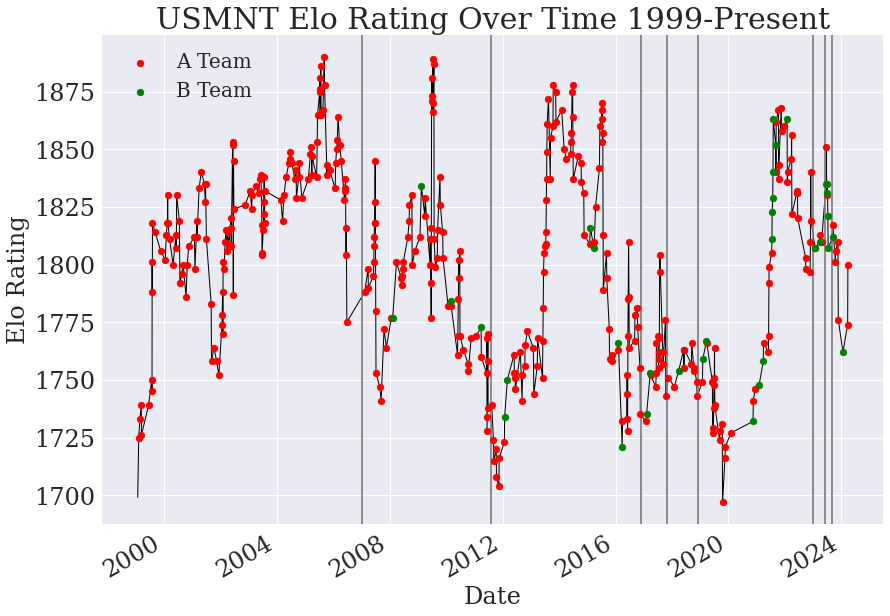

In [118]:
fix, ax = plt.subplots(figsize=(14,10), facecolor='white')

ax.plot(matches['Date'], matches['USMNT Post-Match Elo'], lw=1, c='k')
ax.scatter(a_team['Date'], a_team['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')
ax.scatter(b_team['Date'], b_team['USMNT Post-Match Elo'], c='g', zorder=10, label='B Team')

plt.gcf().autofmt_xdate()

ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Elo Rating', fontsize=24)

ax.axvline(pd.to_datetime("2007-01-01"), c='gray')
ax.axvline(pd.to_datetime("2011-07-29"), c='gray')
ax.axvline(pd.to_datetime("2016-12-01"), c='gray')
ax.axvline(pd.to_datetime("2017-11-01"), c='gray')
ax.axvline(pd.to_datetime("2018-12-02"), c='gray')
ax.axvline(pd.to_datetime("2023-01-01"), c='gray')
ax.axvline(pd.to_datetime("2023-05-30"), c='gray')
ax.axvline(pd.to_datetime("2023-09-01"), c='gray')

ax.set_title('USMNT Elo Rating Over Time 1999-Present', fontsize=30)

ax.legend(fontsize=20, loc='upper left')
ax.tick_params(labelsize=24)

plt.savefig('./USMNT_Elo/elo_1999_present.pdf')

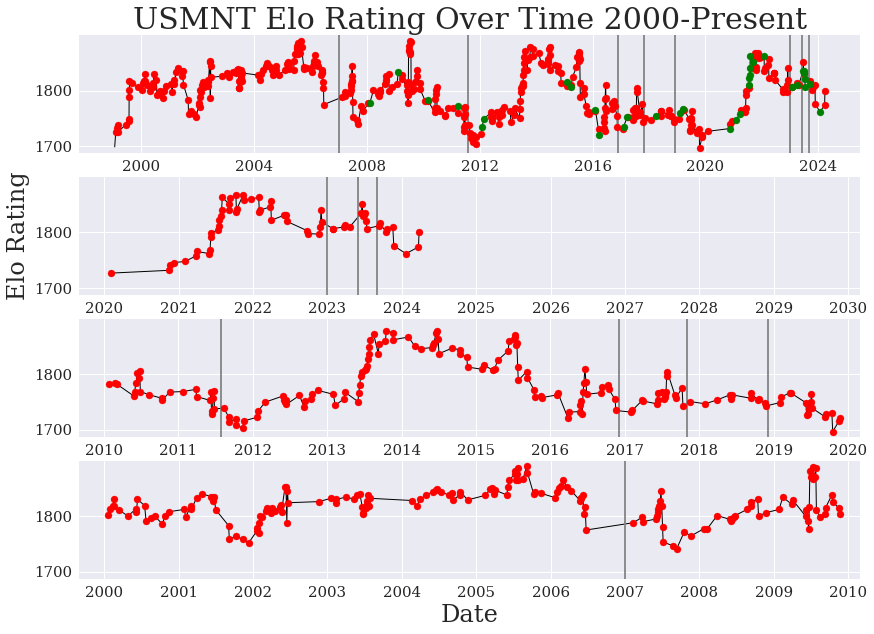

In [151]:
fix, ax = plt.subplots(4, 1, figsize=(14,10), sharey=True, facecolor='white')

ax[0].plot(matches['Date'], matches['USMNT Post-Match Elo'], lw=1, c='k')
ax[0].scatter(a_team['Date'], a_team['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')
ax[0].scatter(b_team['Date'], b_team['USMNT Post-Match Elo'], c='g', zorder=10, label='B Team')

#ax[0].set_xlabel('Date', fontsize=24)
# ax[0].set_ylabel('Elo Rating', fontsize=24)

ax[1].plot(matches_2020s['Date'], matches_2020s['USMNT Post-Match Elo'], lw=1, c='k')
ax[1].scatter(matches_2020s['Date'], matches_2020s['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')

#ax[1].set_xlabel('Date', fontsize=24)
ax[1].set_ylabel('Elo Rating', fontsize=24)

ax[2].plot(matches_2010s['Date'], matches_2010s['USMNT Post-Match Elo'], lw=1, c='k')
ax[2].scatter(matches_2010s['Date'], matches_2010s['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')

#ax[2].set_xlabel('Date', fontsize=24)
# ax[2].set_ylabel('Elo Rating', fontsize=24)

ax[3].plot(matches_2000s['Date'], matches_2000s['USMNT Post-Match Elo'], lw=1, c='k')
ax[3].scatter(matches_2000s['Date'], matches_2000s['USMNT Post-Match Elo'], c='r', zorder=10, label='A Team')

ax[3].set_xlabel('Date', fontsize=24)
# ax[3].set_ylabel('Elo Rating', fontsize=24)

#plt.gcf().autofmt_xdate()

ax[0].axvline(pd.to_datetime("2007-01-01"), c='gray')
ax[0].axvline(pd.to_datetime("2011-07-29"), c='gray')
ax[0].axvline(pd.to_datetime("2016-12-01"), c='gray')
ax[0].axvline(pd.to_datetime("2017-11-01"), c='gray')
ax[0].axvline(pd.to_datetime("2018-12-02"), c='gray')
ax[0].axvline(pd.to_datetime("2023-01-01"), c='gray')
ax[0].axvline(pd.to_datetime("2023-05-30"), c='gray')
ax[0].axvline(pd.to_datetime("2023-09-01"), c='gray')

ax[1].axvline(pd.to_datetime("2023-01-01"), c='gray')
ax[1].axvline(pd.to_datetime("2023-05-30"), c='gray')
ax[1].axvline(pd.to_datetime("2023-09-01"), c='gray')

ax[2].axvline(pd.to_datetime("2011-07-29"), c='gray')
ax[2].axvline(pd.to_datetime("2016-12-01"), c='gray')
ax[2].axvline(pd.to_datetime("2017-11-01"), c='gray')
ax[2].axvline(pd.to_datetime("2018-12-02"), c='gray')

ax[3].axvline(pd.to_datetime("2007-01-01"), c='gray')

ax[0].set_title('USMNT Elo Rating Over Time 2000-Present', fontsize=30)

ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
ax[2].tick_params(labelsize=15)
ax[3].tick_params(labelsize=15)

ax[1].set_xlim(pd.to_datetime("2019-09-01"), pd.to_datetime("2030-03-01"))
ax[2].set_xlim(pd.to_datetime("2009-09-01"), pd.to_datetime("2020-03-01"))
ax[3].set_xlim(pd.to_datetime("1999-09-01"), pd.to_datetime("2010-03-01"))

plt.savefig('./USMNT_Elo/elo_1999_present_detailed.pdf')

#ax.legend(fontsize=20, loc='lower right')

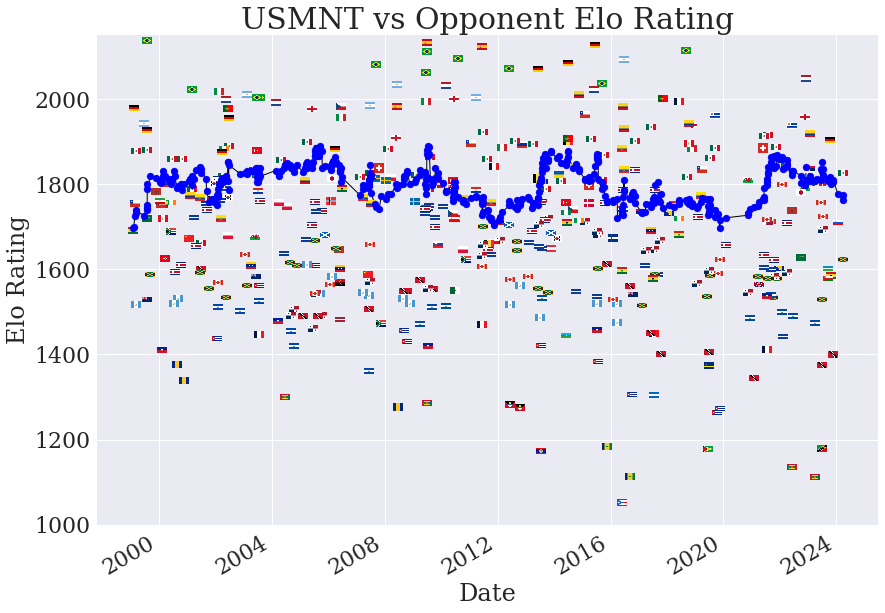

In [120]:
fix, ax = plt.subplots(figsize=(14,10), facecolor='white')

ax.plot(matches['Date'], matches['USMNT Pre-Match Elo'], lw=1, c='k')
ax.scatter(matches['Date'], matches['USMNT Pre-Match Elo'], c='b', zorder=10, label='US Elo')

for x0, y0, path in zip(matches['Date'], matches['Opp Pre-Match Elo'], matches['Opp Flag Path']):

    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.gcf().autofmt_xdate()

ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Elo Rating', fontsize=24)

ax.set_ylim(1000, 2150)

ax.set_title('USMNT vs Opponent Elo Rating', fontsize=30)

ax.tick_params(labelsize=22)

plt.savefig('./USMNT_Elo/elo_flags.pdf')

#ax.legend(fontsize=20, loc='lower right')

In [121]:
opp_matches = matches[matches['Opponent'] == 'Brazil']

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/2185353371.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[val].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.viridis)


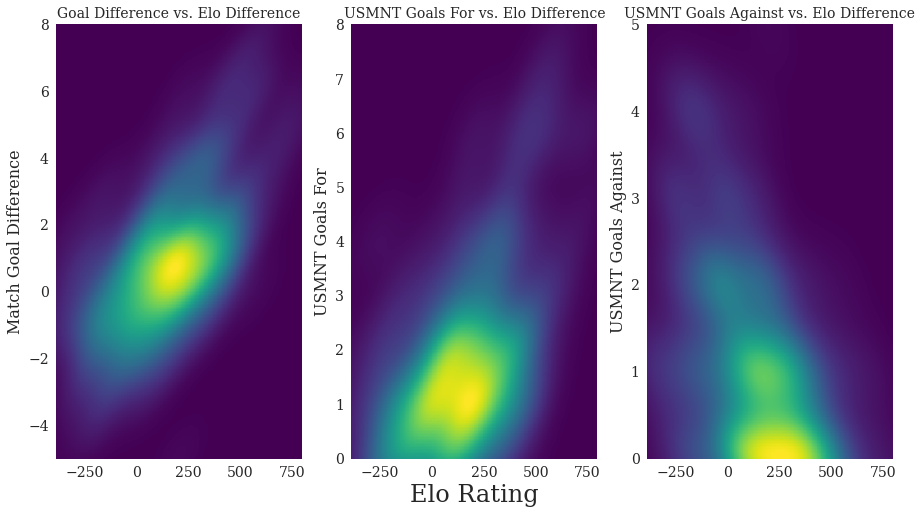

In [122]:
fix, ax = plt.subplots(1, 3, figsize=(15,8), facecolor='white')

y_axes = ['GD', 'GF', 'GA']

nbins=300

for val in range(3):
    
    y_ax = y_axes[val]
    
    k = kde.gaussian_kde([matches['Modified Elo'], matches[y_ax]])

    # Create meshgrid
    xi, yi = np.mgrid[matches['Modified Elo'].min():matches['Modified Elo'].max():nbins*1j, 
                      matches[y_ax].min():matches[y_ax].max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    ax[val].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.viridis)
    
# ax[0].scatter(opp_matches['Elo Diff'], opp_matches['GD'], c='cyan', zorder=5)
# ax[1].scatter(opp_matches['Elo Diff'], opp_matches['GF'], c='cyan', zorder=5)
# ax[2].scatter(opp_matches['Elo Diff'], opp_matches['GA'], c='cyan', zorder=5)

ax[0].set_ylabel('Match Goal Difference', fontsize=16)
ax[1].set_ylabel('USMNT Goals For', fontsize=16)
ax[2].set_ylabel('USMNT Goals Against', fontsize=16)
ax[1].set_xlabel('Elo Rating', fontsize=24)

ax[0].set_title('Goal Difference vs. Elo Difference', fontsize=14)
ax[1].set_title('USMNT Goals For vs. Elo Difference', fontsize=14)
ax[2].set_title('USMNT Goals Against vs. Elo Difference', fontsize=14)
ax[0].grid(visible=True)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)

plt.savefig('./USMNT_Elo/elo_gd.pdf')

#ax[0].legend(fontsize=20, loc='lower right')

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/1744783999.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[val].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.viridis)


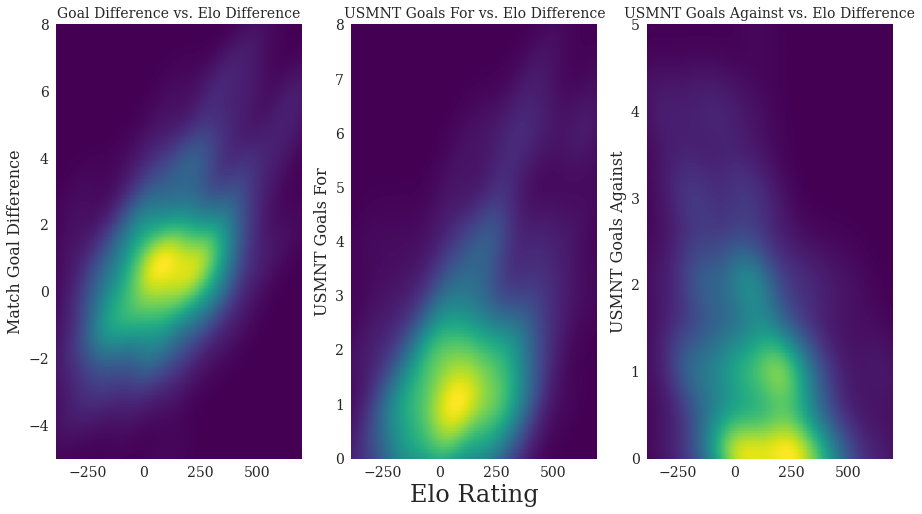

In [152]:
fix, ax = plt.subplots(1, 3, figsize=(15,8), facecolor='white')

y_axes = ['GD', 'GF', 'GA']

nbins=300

for val in range(3):
    
    y_ax = y_axes[val]
    
    k = kde.gaussian_kde([matches['Elo Diff'], matches[y_ax]])

    # Create meshgrid
    xi, yi = np.mgrid[matches['Elo Diff'].min():matches['Elo Diff'].max():nbins*1j, 
                      matches[y_ax].min():matches[y_ax].max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    ax[val].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.viridis)
    
# ax[0].scatter(opp_matches['Elo Diff'], opp_matches['GD'], c='cyan', zorder=5)
# ax[1].scatter(opp_matches['Elo Diff'], opp_matches['GF'], c='cyan', zorder=5)
# ax[2].scatter(opp_matches['Elo Diff'], opp_matches['GA'], c='cyan', zorder=5)

ax[0].set_ylabel('Match Goal Difference', fontsize=16)
ax[1].set_ylabel('USMNT Goals For', fontsize=16)
ax[2].set_ylabel('USMNT Goals Against', fontsize=16)
ax[1].set_xlabel('Elo Rating', fontsize=24)

ax[0].set_title('Goal Difference vs. Elo Difference', fontsize=14)
ax[1].set_title('USMNT Goals For vs. Elo Difference', fontsize=14)
ax[2].set_title('USMNT Goals Against vs. Elo Difference', fontsize=14)
ax[0].grid(visible=True)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)

plt.savefig('./USMNT_Elo/elo_gd.pdf')

#ax[0].legend(fontsize=20, loc='lower right')

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/3571134420.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[val].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.viridis)


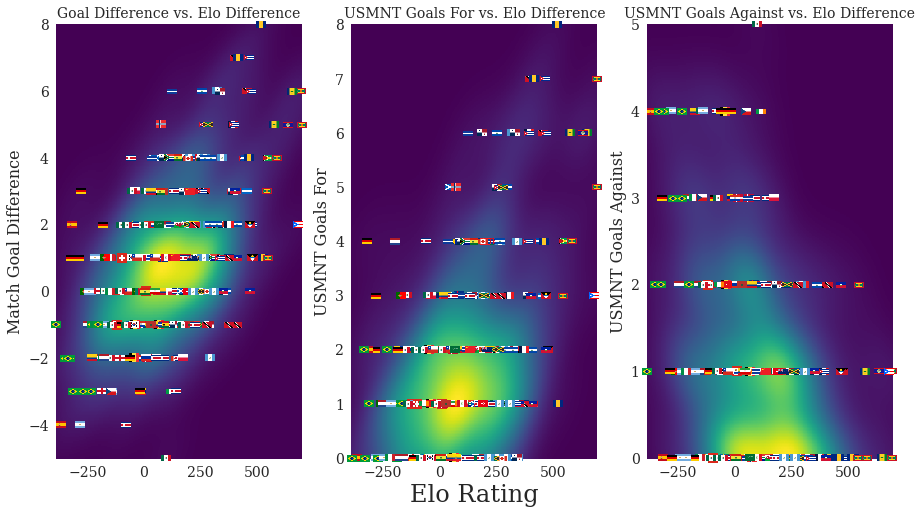

In [123]:
fix, ax = plt.subplots(1, 3, figsize=(15,8), facecolor='white')

y_axes = ['GD', 'GF', 'GA']

nbins=300

for x0, y0, y1, y2, path in zip(matches['Elo Diff'], matches['GD'], matches['GF'], 
                                matches['GA'], matches['Opp Flag Path']):

    ab0 = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ab1 = AnnotationBbox(getImage(path), (x0, y1), frameon=False)
    ab2 = AnnotationBbox(getImage(path), (x0, y2), frameon=False)
    
    ax[0].add_artist(ab0)
    ax[1].add_artist(ab1)
    ax[2].add_artist(ab2)

for val in range(3):
    
    y_ax = y_axes[val]
    
    k = kde.gaussian_kde([matches['Elo Diff'],matches[y_ax]])

    # Create meshgrid
    xi, yi = np.mgrid[matches['Elo Diff'].min():matches['Elo Diff'].max():nbins*1j, 
                      matches[y_ax].min():matches[y_ax].max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    ax[val].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.viridis)
    
# ax[0].scatter(opp_matches['Elo Diff'], opp_matches['GD'], c='cyan', zorder=5)
# ax[1].scatter(opp_matches['Elo Diff'], opp_matches['GF'], c='cyan', zorder=5)
# ax[2].scatter(opp_matches['Elo Diff'], opp_matches['GA'], c='cyan', zorder=5)

ax[0].set_ylabel('Match Goal Difference', fontsize=16)
ax[1].set_ylabel('USMNT Goals For', fontsize=16)
ax[2].set_ylabel('USMNT Goals Against', fontsize=16)
ax[1].set_xlabel('Elo Rating', fontsize=24)

ax[0].set_title('Goal Difference vs. Elo Difference', fontsize=14)
ax[1].set_title('USMNT Goals For vs. Elo Difference', fontsize=14)
ax[2].set_title('USMNT Goals Against vs. Elo Difference', fontsize=14)
ax[0].grid(visible=True)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)

plt.savefig('./USMNT_Elo/elo_gd_flags.pdf')

#ax[0].legend(fontsize=20, loc='lower right')

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/3905550362.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(elos)


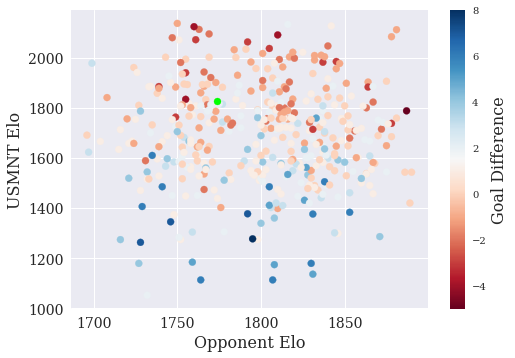

In [124]:
fig, ax = plt.subplots()

elos = ax.scatter(matches['USMNT Pre-Match Elo'], matches['Opp Pre-Match Elo'], c=matches['GD'],  cmap='RdBu')

ax.scatter(1774, 1826, c='lime')

cbar = plt.colorbar(elos)
ax.set_xlabel('Opponent Elo', fontsize=16)
ax.set_ylabel('USMNT Elo', fontsize=16)

cbar.ax.set_ylabel('Goal Difference', fontsize=16)

ax.tick_params(labelsize=14)

In [125]:
gd_means, gd_stds = calc_binned_goalnums(matches, 'GD')
gf_means, gf_stds = calc_binned_goalnums(matches, 'GF')
ga_means, ga_stds = calc_binned_goalnums(matches, 'GA')

In [126]:
print(gd_means.loc[1800, 1765], '±', gd_stds.loc[1800, 1765])

0.8 ± 1.5999999999999999


In [127]:
print(gf_means.loc[1800, 1753.5], '±', gf_stds.loc[1800, 1753.5])

1.0 ± 0.8944271909999159


In [128]:
print(ga_means.loc[1800, 1753.5], '±', ga_stds.loc[1800, 1753.5])

1.2 ± 1.4696938456699067


In [129]:
usmnt_elos = np.arange(1650, 1950, 11.5)
opp_elos = np.arange(1000, 2350, 50)

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/221420641.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(usmnt_elos, opp_elos, gd_means, cmap='RdBu')
/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/221420641.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mesh)


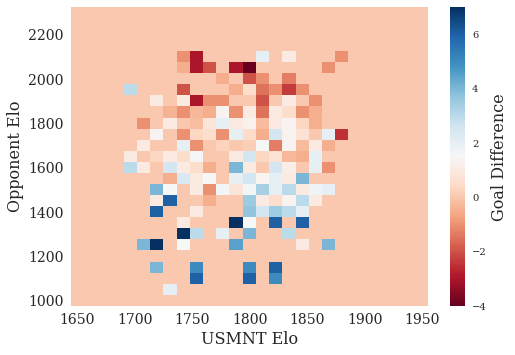

In [130]:
fig, ax = plt.subplots()

mesh = ax.pcolormesh(usmnt_elos, opp_elos, gd_means, cmap='RdBu')

# ax.scatter(1618, 1762, c='lime', s=100)

cbar = fig.colorbar(mesh)

ax.set_xlabel('USMNT Elo', fontsize=16)
ax.set_ylabel('Opponent Elo', fontsize=16)

cbar.ax.set_ylabel('Goal Difference', fontsize=16)

ax.tick_params(labelsize=14)

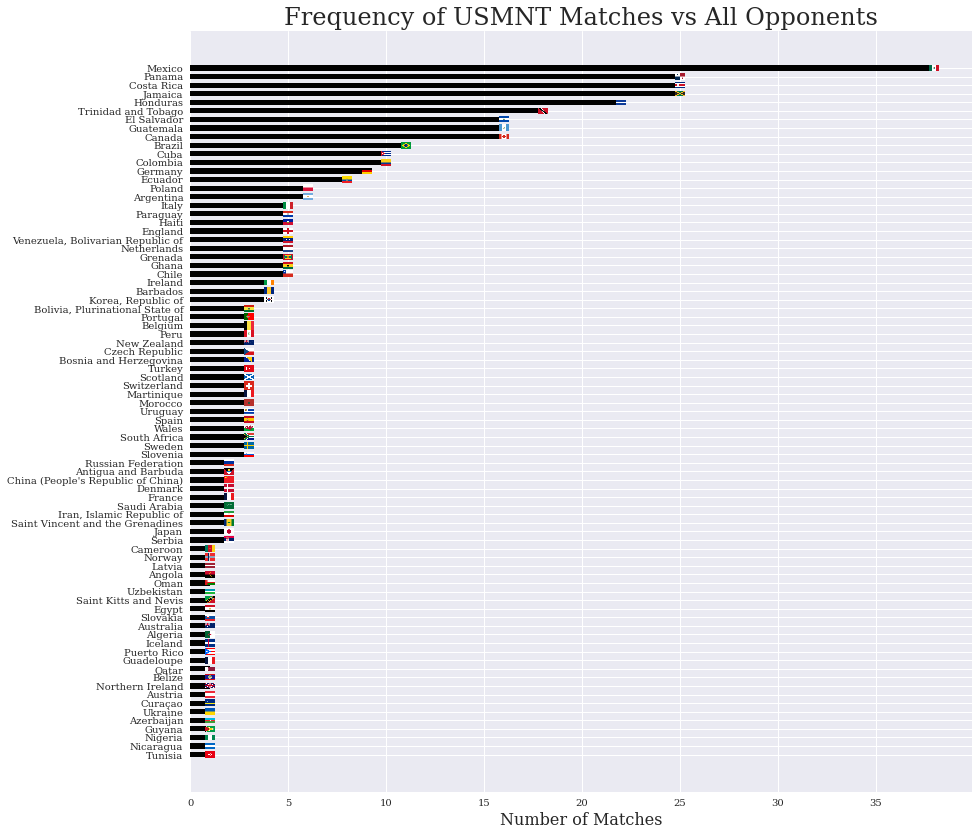

In [131]:
opp_counts = matches['Opponent'].value_counts()

opp_counts_paths = matches['Opp Flag Path'].value_counts()

fig, ax = plt.subplots(figsize=(14,14), facecolor='white')

ypos = np.arange(len(opp_counts))

for x0, y0, path in zip(ypos, opp_counts, opp_counts_paths.index):

    ab = AnnotationBbox(getImage(path), (y0, x0), frameon=False)
    ax.add_artist(ab)

ax.barh(ypos, opp_counts, height=0.6, color='black')

ax.set_title('Frequency of USMNT Matches vs All Opponents', fontsize=24)
ax.set_xlabel('Number of Matches', fontsize=16)

ax.set_yticks(ypos, labels=opp_counts.index)
ax.invert_yaxis()

ax.tick_params(labelsize=10)

plt.savefig('./USMNT_Elo/elo_frequency_flags.pdf')

plt.show()

In [132]:
puli_matches = matches[matches['Date'] >= pd.to_datetime("2016-03-30") ]

In [133]:
wes_matches = matches[matches['Date'] >= pd.to_datetime("2017-11-14") ]

In [134]:
gio_matches = matches[matches['Date'] >= pd.to_datetime("2020-11-12") ]

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/3677407893.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(elos)
/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/3677407893.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(elos)


Text(0, 0.5, 'Elo Difference')

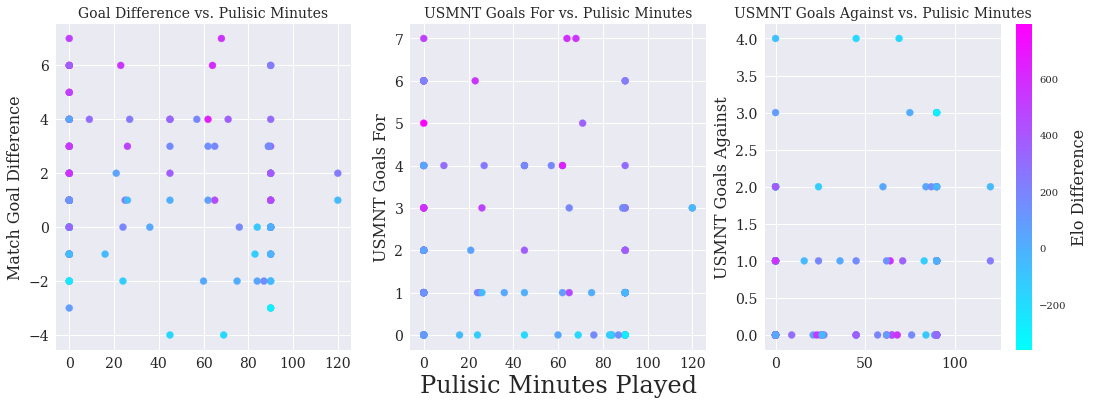

In [135]:
fix, ax = plt.subplots(1, 3, figsize=(18,6), facecolor='white')

elos = ax[0].scatter(puli_matches['Pulisic MP'], puli_matches['GD'], c=puli_matches['Modified Elo'],  cmap='cool')
ax[1].scatter(puli_matches['Pulisic MP'], puli_matches['GF'], c=puli_matches['Modified Elo'],  cmap='cool')
ax[2].scatter(puli_matches['Pulisic MP'], puli_matches['GA'], c=puli_matches['Modified Elo'],  cmap='cool')

ax[0].set_ylabel('Match Goal Difference', fontsize=16)
ax[1].set_ylabel('USMNT Goals For', fontsize=16)
ax[2].set_ylabel('USMNT Goals Against', fontsize=16)
ax[1].set_xlabel('Pulisic Minutes Played', fontsize=24)

ax[0].set_title('Goal Difference vs. Pulisic Minutes', fontsize=14)
ax[1].set_title('USMNT Goals For vs. Pulisic Minutes', fontsize=14)
ax[2].set_title('USMNT Goals Against vs. Pulisic Minutes', fontsize=14)
ax[0].grid(visible=True)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)

cbar = plt.colorbar(elos)
cbar.ax.set_ylabel('Elo Difference', fontsize=16)

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/3421184420.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(elos)
/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/3421184420.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(elos)


Text(0, 0.5, 'Elo Difference')

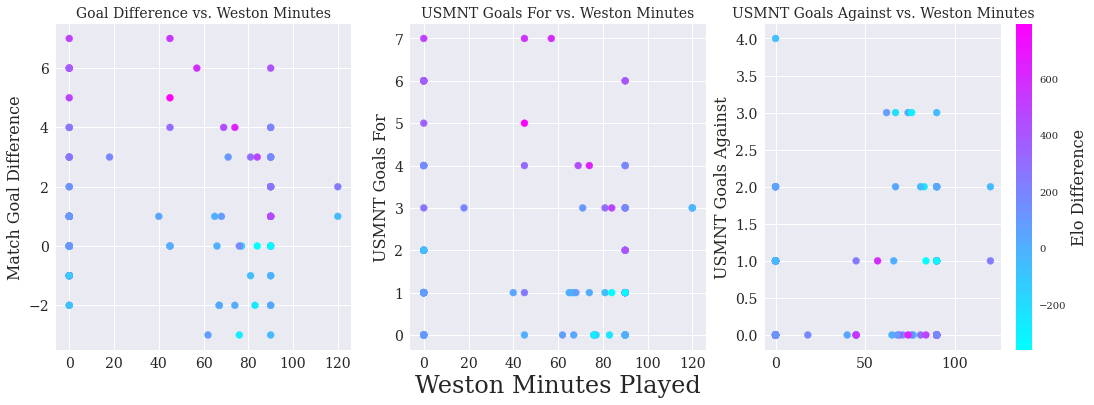

In [136]:
fix, ax = plt.subplots(1, 3, figsize=(18,6), facecolor='white')

elos = ax[0].scatter(wes_matches['McKennie MP'], wes_matches['GD'], c=wes_matches['Modified Elo'],  cmap='cool')
ax[1].scatter(wes_matches['McKennie MP'], wes_matches['GF'], c=wes_matches['Modified Elo'],  cmap='cool')
ax[2].scatter(wes_matches['McKennie MP'], wes_matches['GA'], c=wes_matches['Modified Elo'],  cmap='cool')

ax[0].set_ylabel('Match Goal Difference', fontsize=16)
ax[1].set_ylabel('USMNT Goals For', fontsize=16)
ax[2].set_ylabel('USMNT Goals Against', fontsize=16)
ax[1].set_xlabel('Weston Minutes Played', fontsize=24)

ax[0].set_title('Goal Difference vs. Weston Minutes', fontsize=14)
ax[1].set_title('USMNT Goals For vs. Weston Minutes', fontsize=14)
ax[2].set_title('USMNT Goals Against vs. Weston Minutes', fontsize=14)
ax[0].grid(visible=True)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)

cbar = plt.colorbar(elos)
cbar.ax.set_ylabel('Elo Difference', fontsize=16)

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/1930901120.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(elos)
/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/1930901120.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(elos)


Text(0, 0.5, 'Elo Difference')

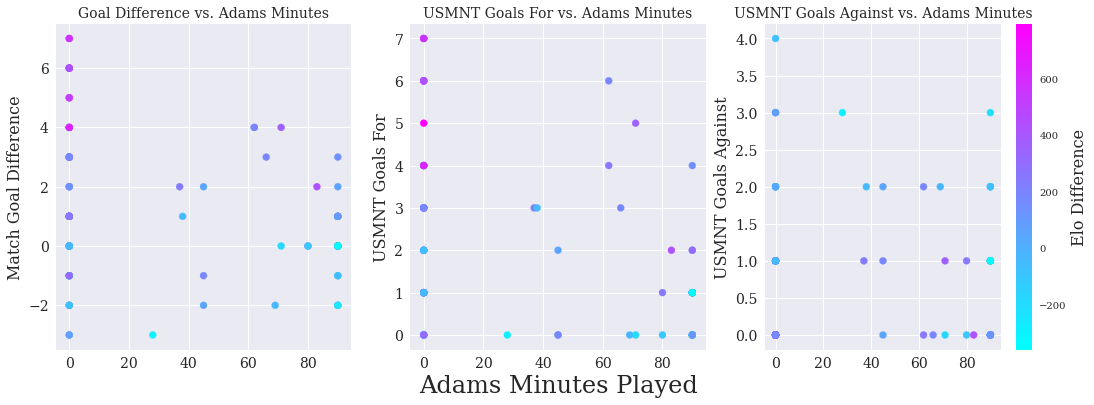

In [137]:
fix, ax = plt.subplots(1, 3, figsize=(18,6), facecolor='white')

elos = ax[0].scatter(wes_matches['Adams MP'], wes_matches['GD'], c=wes_matches['Modified Elo'],  cmap='cool')
ax[1].scatter(wes_matches['Adams MP'], wes_matches['GF'], c=wes_matches['Modified Elo'],  cmap='cool')
ax[2].scatter(wes_matches['Adams MP'], wes_matches['GA'], c=wes_matches['Modified Elo'],  cmap='cool')

ax[0].set_ylabel('Match Goal Difference', fontsize=16)
ax[1].set_ylabel('USMNT Goals For', fontsize=16)
ax[2].set_ylabel('USMNT Goals Against', fontsize=16)
ax[1].set_xlabel('Adams Minutes Played', fontsize=24)

ax[0].set_title('Goal Difference vs. Adams Minutes', fontsize=14)
ax[1].set_title('USMNT Goals For vs. Adams Minutes', fontsize=14)
ax[2].set_title('USMNT Goals Against vs. Adams Minutes', fontsize=14)
ax[0].grid(visible=True)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)

cbar = plt.colorbar(elos)
cbar.ax.set_ylabel('Elo Difference', fontsize=16)

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/2054128006.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(elos)
/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/2054128006.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(elos)


Text(0, 0.5, 'Elo Difference')

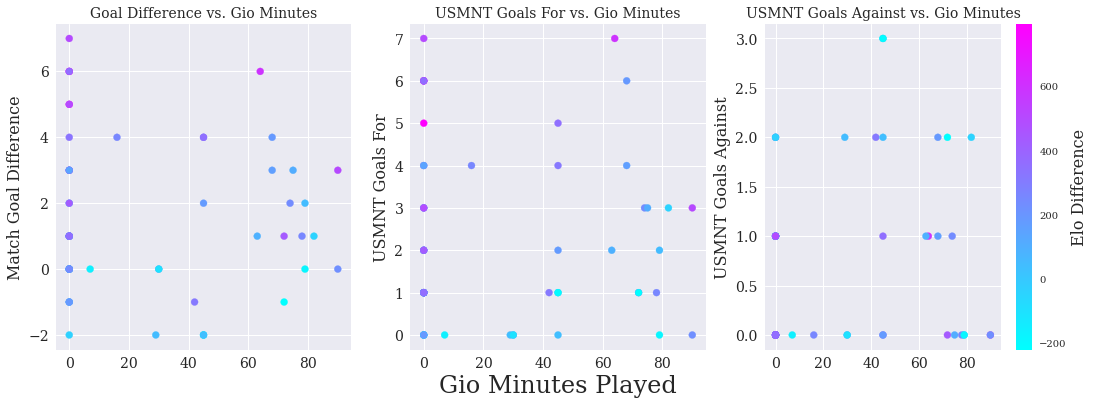

In [138]:
fix, ax = plt.subplots(1, 3, figsize=(18,6), facecolor='white')

elos = ax[0].scatter(gio_matches['Gio MP'], gio_matches['GD'], c=gio_matches['Modified Elo'],  cmap='cool')
ax[1].scatter(gio_matches['Gio MP'], gio_matches['GF'], c=gio_matches['Modified Elo'],  cmap='cool')
ax[2].scatter(gio_matches['Gio MP'], gio_matches['GA'], c=gio_matches['Modified Elo'],  cmap='cool')

ax[0].set_ylabel('Match Goal Difference', fontsize=16)
ax[1].set_ylabel('USMNT Goals For', fontsize=16)
ax[2].set_ylabel('USMNT Goals Against', fontsize=16)
ax[1].set_xlabel('Gio Minutes Played', fontsize=24)

ax[0].set_title('Goal Difference vs. Gio Minutes', fontsize=14)
ax[1].set_title('USMNT Goals For vs. Gio Minutes', fontsize=14)
ax[2].set_title('USMNT Goals Against vs. Gio Minutes', fontsize=14)
ax[0].grid(visible=True)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)

cbar = plt.colorbar(elos)
cbar.ax.set_ylabel('Elo Difference', fontsize=16)

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/1441427488.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(elos)
/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/1441427488.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(elos)


Text(0, 0.5, 'Elo Difference')

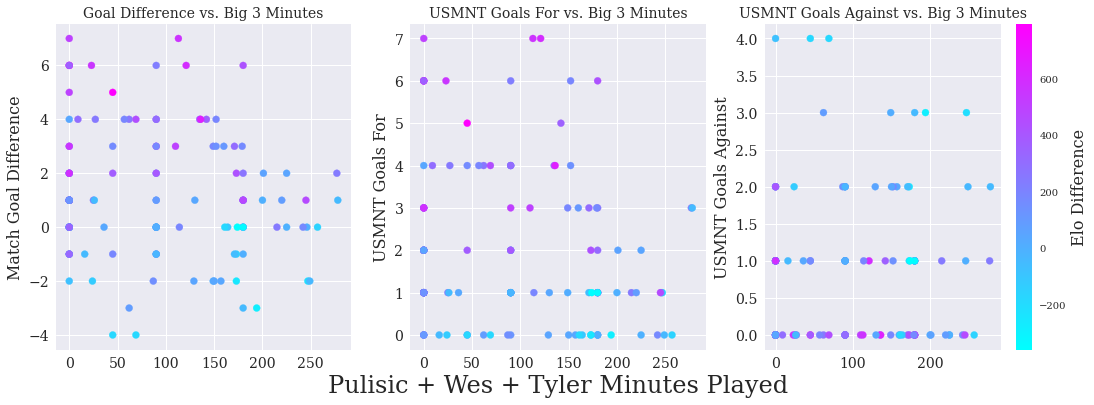

In [139]:
fix, ax = plt.subplots(1, 3, figsize=(18,6), facecolor='white')

elos = ax[0].scatter(puli_matches['Pulisic MP']+puli_matches['McKennie MP']+puli_matches['Adams MP'], puli_matches['GD'], c=puli_matches['Modified Elo'],  cmap='cool')
ax[1].scatter(puli_matches['Pulisic MP']+puli_matches['McKennie MP']+puli_matches['Adams MP'], puli_matches['GF'], c=puli_matches['Modified Elo'],  cmap='cool')
ax[2].scatter(puli_matches['Pulisic MP']+puli_matches['McKennie MP']+puli_matches['Adams MP'], puli_matches['GA'], c=puli_matches['Modified Elo'],  cmap='cool')

ax[0].set_ylabel('Match Goal Difference', fontsize=16)
ax[1].set_ylabel('USMNT Goals For', fontsize=16)
ax[2].set_ylabel('USMNT Goals Against', fontsize=16)
ax[1].set_xlabel('Pulisic + Wes + Tyler Minutes Played', fontsize=24)

ax[0].set_title('Goal Difference vs. Big 3 Minutes', fontsize=14)
ax[1].set_title('USMNT Goals For vs. Big 3 Minutes', fontsize=14)
ax[2].set_title('USMNT Goals Against vs. Big 3 Minutes', fontsize=14)
ax[0].grid(visible=True)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)

cbar = plt.colorbar(elos)
cbar.ax.set_ylabel('Elo Difference', fontsize=16)

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/548697972.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(elos)
/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/548697972.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(elos)


Text(0, 0.5, 'Elo Difference')

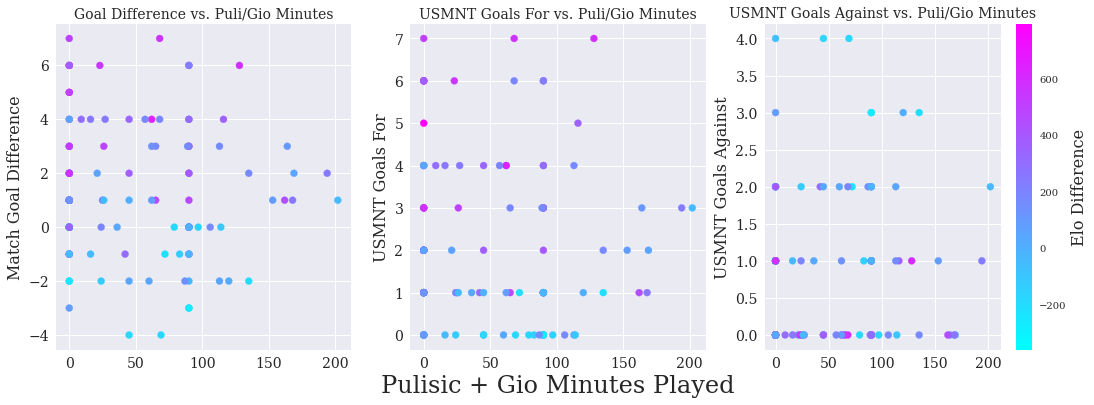

In [140]:
fix, ax = plt.subplots(1, 3, figsize=(18,6), facecolor='white')

elos = ax[0].scatter(puli_matches['Pulisic MP']+puli_matches['Gio MP'], puli_matches['GD'], c=puli_matches['Modified Elo'],  cmap='cool')
ax[1].scatter(puli_matches['Pulisic MP']+puli_matches['Gio MP'], puli_matches['GF'], c=puli_matches['Modified Elo'],  cmap='cool')
ax[2].scatter(puli_matches['Pulisic MP']+puli_matches['Gio MP'], puli_matches['GA'], c=puli_matches['Modified Elo'],  cmap='cool')

ax[0].set_ylabel('Match Goal Difference', fontsize=16)
ax[1].set_ylabel('USMNT Goals For', fontsize=16)
ax[2].set_ylabel('USMNT Goals Against', fontsize=16)
ax[1].set_xlabel('Pulisic + Gio Minutes Played', fontsize=24)

ax[0].set_title('Goal Difference vs. Puli/Gio Minutes', fontsize=14)
ax[1].set_title('USMNT Goals For vs. Puli/Gio Minutes', fontsize=14)
ax[2].set_title('USMNT Goals Against vs. Puli/Gio Minutes', fontsize=14)
ax[0].grid(visible=True)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)

cbar = plt.colorbar(elos)
cbar.ax.set_ylabel('Elo Difference', fontsize=16)

/var/folders/7q/fly3z8xs21vc5yvc2rqhgmkh0000gn/T/ipykernel_39090/1485028901.py:49: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(elos, ax=ax[:, :])


Text(0.5, 0.98, 'USMNT Performance vs Star Player Minutes')

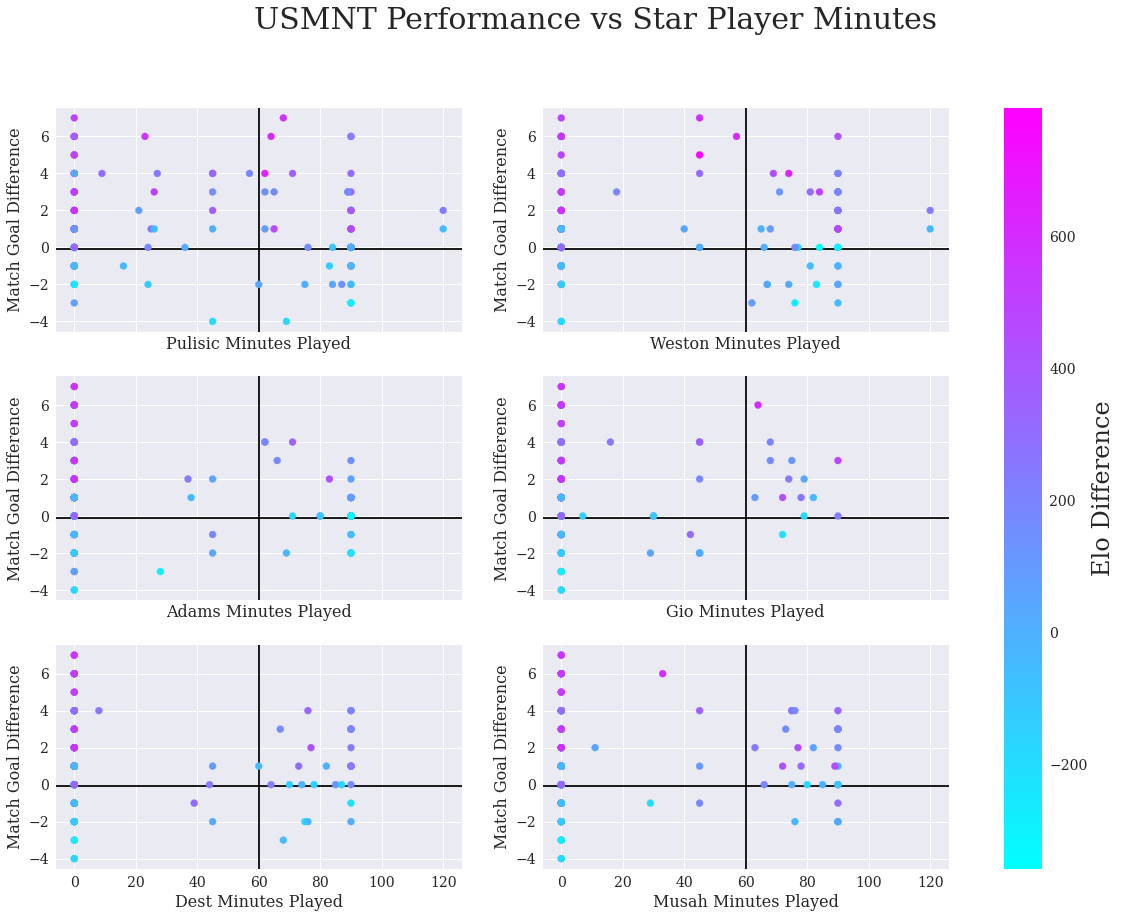

In [141]:
fix, ax = plt.subplots(3, 2, figsize=(20,14), facecolor='white', sharex=True)

elos = ax[0][0].scatter(puli_matches['Pulisic MP'], puli_matches['GD'], c=puli_matches['Modified Elo'],  cmap='cool', zorder=5)
ax[0][1].scatter(puli_matches['McKennie MP'], puli_matches['GD'], c=puli_matches['Modified Elo'],  cmap='cool', zorder=5)
ax[1][0].scatter(puli_matches['Adams MP'], puli_matches['GD'], c=puli_matches['Modified Elo'],  cmap='cool', zorder=5)
ax[1][1].scatter(puli_matches['Gio MP'], puli_matches['GD'], c=puli_matches['Modified Elo'],  cmap='cool', zorder=5)
ax[2][0].scatter(puli_matches['Dest MP'], puli_matches['GD'], c=puli_matches['Modified Elo'],  cmap='cool', zorder=5)
ax[2][1].scatter(puli_matches['Musah MP'], puli_matches['GD'], c=puli_matches['Modified Elo'],  cmap='cool', zorder=5)

ax[0][0].axhline(-0.1, c='k', zorder=1)
ax[1][0].axhline(-0.1, c='k', zorder=1)
ax[0][1].axhline(-0.1, c='k', zorder=1)
ax[1][1].axhline(-0.1, c='k', zorder=1)
ax[2][0].axhline(-0.1, c='k', zorder=1)
ax[2][1].axhline(-0.1, c='k', zorder=1)

ax[0][0].axvline(60, c='k', zorder=1)
ax[1][0].axvline(60, c='k', zorder=1)
ax[0][1].axvline(60, c='k', zorder=1)
ax[1][1].axvline(60, c='k', zorder=1)
ax[2][0].axvline(60, c='k', zorder=1)
ax[2][1].axvline(60, c='k', zorder=1)

ax[0][0].set_ylabel('Match Goal Difference', fontsize=16)
ax[0][0].set_xlabel('Pulisic Minutes Played', fontsize=16)

ax[0][1].set_ylabel('Match Goal Difference', fontsize=16)
ax[0][1].set_xlabel('Weston Minutes Played', fontsize=16)

ax[1][0].set_ylabel('Match Goal Difference', fontsize=16)
ax[1][0].set_xlabel('Adams Minutes Played', fontsize=16)

ax[1][1].set_ylabel('Match Goal Difference', fontsize=16)
ax[1][1].set_xlabel('Gio Minutes Played', fontsize=16)

ax[2][0].set_ylabel('Match Goal Difference', fontsize=16)
ax[2][0].set_xlabel('Dest Minutes Played', fontsize=16)

ax[2][1].set_ylabel('Match Goal Difference', fontsize=16)
ax[2][1].set_xlabel('Musah Minutes Played', fontsize=16)

ax[0][0].tick_params(labelsize=14)
ax[1][0].tick_params(labelsize=14)
ax[0][1].tick_params(labelsize=14)
ax[1][1].tick_params(labelsize=14)
ax[2][0].tick_params(labelsize=14)
ax[2][1].tick_params(labelsize=14)

cbar = plt.colorbar(elos, ax=ax[:, :])
cbar.ax.set_ylabel('Elo Difference', fontsize=24)
cbar.ax.tick_params(labelsize=14)

plt.suptitle('USMNT Performance vs Star Player Minutes', fontsize=30)


In [142]:
for val in range(len(matches[matches['Modified Elo'] < -100])):
    if matches[matches['Modified Elo'] < -100].iloc[val, 10] > 0:
        print(matches[matches['Modified Elo'] < -100].iloc[val, [0, 1, 5, 10]])
    

Date                 2015-06-12 00:00:00
Opponent                         Germany
Opp Pre-Match Elo                   2127
GD                                     1
Name: 143, dtype: object
Date                 2015-06-07 00:00:00
Opponent                     Netherlands
Opp Pre-Match Elo                   2022
GD                                     1
Name: 144, dtype: object
Date                 2013-06-04 00:00:00
Opponent                         Germany
Opp Pre-Match Elo                   2071
GD                                     1
Name: 182, dtype: object
Date                 2012-08-17 00:00:00
Opponent                          Mexico
Opp Pre-Match Elo                   1901
GD                                     1
Name: 193, dtype: object
Date                 2012-03-02 00:00:00
Opponent                           Italy
Opp Pre-Match Elo                   1886
GD                                     1
Name: 199, dtype: object
Date                 2009-06-26 00:00:00
Opponent      